<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_7/capstone/RD/7_1e_Lyric_Contextual_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lyric Contextual Embeddings
- Embedding Vectors
- Model Embeddings


## Load Data

In [0]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

#import tensorflow_hub as hub
#import tensorflow as tf

#import scipy as sp
#from scipy import spatial

#from sklearn.manifold import TSNE
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

#print(tf.__version__)
#elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [2]:
# change field size to avoid ParseError
import sys
import csv

csv.field_size_limit(sys.maxsize)

filename = "lyric_test_data_parsed"
# set engine="python" to avoid ParseError
# set error_bad_lines=False
#df_lyrics = pd.read_csv(filename + ".csv", index_col=0,
#                        engine="python", error_bad_lines=False)
df_lyrics = pd.read_csv(filename + ".csv", index_col=0)
# make sure lyric data is type string
df_lyrics['lyrics_raw'] = df_lyrics['lyrics_raw'].astype(str)
df_lyrics['lyrics_clean'] = df_lyrics['lyrics_clean'].astype(str)
df_lyrics.head()

,id,lyrics_raw,length_raw,lyrics_clean,length_clean,lyrics_parsed,length_parsed,lyrics_nostops,length_nostops
0,7eElVgPcxDqmgGrSwVFI74,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485.0,night midnight lose my mind night midnight lo...,2275.0,"[' ', 'night', 'midnight', 'lose', '-PRON-', '...",494,"[' ', 'night', 'midnight', 'lose', 'mind', 'ni...",187
1,02oAUzv4M0ItuTDy2RT3IT,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795.0,couple rebel top gun pilots flying with nowhe...,1621.0,"[' ', 'couple', 'rebel', 'top', 'gun', 'pilot'...",309,"[' ', 'couple', 'rebel', 'gun', 'pilot', 'fly'...",169
2,5q4BpnMrYEFzLO0dYODj6J,"[Verse 1]\nWell, summer slipped us underneath ...",1824.0,well summer slipped us underneath her tongue ...,1665.0,"[' ', 'well', 'summer', 'slip', '-PRON-', 'und...",334,"[' ', 'summer', 'slip', 'underneath', 'tongue'...",151
3,6Kkt27YmFyIFrcX3QXFi2o,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305.0,one two baby really hurt me crying in the tax...,1157.0,"[' ', 'one', 'two', 'baby', 'really', 'hurt', ...",242,"[' ', 'baby', 'hurt', 'cry', 'taxi', 'don', 'w...",101
4,1Dp7JGFNjvg8Nk0CtMCcnr,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386.0,hard feelings go back and tell it please could...,2189.0,"['hard', 'feeling', 'go', 'back', 'and', 'tell...",458,"['hard', 'feeling', 'tell', 'tender', 'sit', '...",244


In [3]:
filename = "spotify_test_data"
df_af = pd.read_csv(filename + ".csv", index_col=0)

df_af.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence,track_names,artist_names,album_names,release_dates,popularity,explicit
0,0.1730,https://api.spotify.com/v1/audio-analysis/7eEl...,0.796,197236,0.467,7eElVgPcxDqmgGrSwVFI74,0.004110,6,0.1260,-10.369,1,0.1810,1,107.901,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.516,Sober,Lorde,Melodrama,2017-06-16,59,True
1,0.2870,https://api.spotify.com/v1/audio-analysis/02oA...,0.771,189796,0.431,02oAUzv4M0ItuTDy2RT3IT,0.000003,10,0.0934,-5.423,1,0.0577,1,107.047,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.268,Homemade Dynamite,Lorde,Melodrama,2017-06-16,60,True
2,0.2390,https://api.spotify.com/v1/audio-analysis/5q4B...,0.664,271088,0.382,5q4BpnMrYEFzLO0dYODj6J,0.007490,0,0.0943,-9.977,1,0.0470,1,123.214,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.126,The Louvre,Lorde,Melodrama,2017-06-16,61,False
3,0.9200,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.587,171728,0.229,6Kkt27YmFyIFrcX3QXFi2o,0.000000,10,0.1000,-11.254,0,0.1280,1,75.670,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.379,Liability,Lorde,Melodrama,2017-06-16,69,False
4,0.0328,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.487,367391,0.445,1Dp7JGFNjvg8Nk0CtMCcnr,0.010400,1,0.0778,-10.959,0,0.1130,1,97.031,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.180,Hard Feelings/Loveless,Lorde,Melodrama,2017-06-16,60,True


In [4]:
filename = "lyric_embeddings_1024"
df_emb = pd.read_csv(filename + ".csv", index_col=0)

df_emb.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,7eElVgPcxDqmgGrSwVFI74,-1.176089,-0.107737,-0.569370,-0.250905,-0.196079,0.233768,0.643306,1.164762,-0.953797,0.885341,0.233456,1.157343,-1.184159,2.234673,1.082309,1.509842,1.017656,0.275086,0.189763,0.016859,-0.937232,0.386363,-0.124789,-0.556945,-0.054143,-0.929406,-0.012605,0.002390,0.076078,1.339858,-0.044450,0.330110,0.442595,0.388205,-0.376086,0.700518,0.621598,0.748061,-0.216787,...,-0.798792,0.545758,-1.742035,1.100794,-0.220692,0.231865,-1.909952,0.287531,1.090605,-0.316892,-0.428898,-1.394379,0.174889,0.161786,0.455423,-0.789939,0.718991,0.441111,-3.599369,0.491262,2.301007,-0.248004,-0.391195,-1.016250,3.749099,-1.811283,-0.371740,0.443924,1.509911,0.873805,1.110983,0.665313,-0.374531,1.115654,1.214633,-1.089690,0.626421,0.225999,1.874248,0.061833
1,02oAUzv4M0ItuTDy2RT3IT,-0.818456,-0.335162,-0.709084,-0.453882,-0.044109,-0.442736,0.629614,1.860680,-0.421865,1.260538,0.633872,1.731610,-0.870405,1.403824,2.325687,1.376182,0.929350,1.006097,0.436990,-0.342039,-0.436087,0.256072,0.461765,-1.524332,-0.195616,-0.076263,-0.307228,-0.743518,-0.357217,0.622497,0.169596,0.113535,1.616498,0.245950,0.090101,1.020024,0.232876,0.335385,-0.841537,...,0.285158,-0.263945,0.749996,0.654952,-0.238688,-0.054873,-1.097025,0.391275,0.748996,-0.616449,-0.261274,-0.062964,-0.156516,0.493264,-0.154108,-1.271534,-0.117976,0.833755,-2.488465,0.329558,1.326031,0.313144,0.049839,-1.980360,2.495708,-1.027027,-0.406434,0.175048,1.367751,-0.353575,-0.577227,0.156613,-0.466348,0.963598,0.362988,-1.543788,1.052845,-0.416015,1.296092,0.121682
2,5q4BpnMrYEFzLO0dYODj6J,-0.878218,0.282790,-0.808863,-0.433924,0.407604,-0.123266,1.535059,2.379490,-0.050003,1.327469,0.951804,1.565531,-2.178823,2.941031,2.310419,0.691588,0.846726,0.990229,-0.498455,-0.957336,-0.606049,0.509263,-0.357404,-0.061091,-0.657854,0.445772,0.291457,-0.649670,-0.397943,0.907033,0.644040,1.077925,0.929998,-0.379858,-0.019066,1.889962,-0.469290,0.961969,-0.685247,...,0.242475,0.261855,-1.700499,1.223980,0.194463,0.149520,-1.180804,0.501860,1.182535,-0.521616,0.022584,-0.413291,-0.211203,-0.180345,0.320369,0.002017,0.229807,1.572091,-3.182798,0.267235,1.822537,-0.073181,-0.531030,-1.385447,3.121033,-1.586558,-1.017582,0.794861,2.035471,1.305898,-0.218693,0.765706,0.129413,0.004000,1.214114,-0.778976,0.771592,0.742636,1.440566,0.341989
3,6Kkt27YmFyIFrcX3QXFi2o,-0.466507,0.792432,-0.494447,-0.100590,0.546727,-0.253614,0.794765,2.198832,-0.234965,0.627541,0.867905,1.829224,-1.905063,2.337999,1.501105,0.749387,1.298659,0.994754,-0.205810,-0.534288,-0.753254,0.670505,0.460462,-0.790256,-0.331815,0.215781,-0.252302,-1.027334,-0.459904,1.226175,0.722869,0.377776,0.561733,-0.383966,1.132673,1.598741,-0.868457,0.226428,-0.208647,...,-0.333039,-0.237912,-0.983652,1.242136,0.472568,-0.082934,-1.539467,-0.382526,1.190959,-0.089749,-0.371374,-0.707636,-0.157277,-0.374877,0.577229,-0.268020,-0.225148,0.318669,-2.760939,0.618850,1.227416,0.366311,-0.322368,-1.513218,2.884911,-1.859549,-0.601079,0.124937,1.923958,0.742204,0.565165,0.367270,0.400754,0.731161,0.027032,-1.258719,0.053601,0.620349,1.534137,0.729435
4,1Dp7JGFNjvg8Nk0CtMCcnr,-0.821989,1.116456,-0.099389,0.346411,0.864321,-0.394252,0.421176,1.416335,-0.827872,1.231101,0.509105,1.946500,-1.710877,1.770404,1.396535,1.170612,0.788084,1.045131,-0.393810,-0.345053,-0.226228,1.440690,0.052912,-0.692761,-0.927573,-0.514701,-0.332411,-1.399359,-0.215262,1.182957,0.182795,0.323677,0.178181,0.203908,0.652043,1.405541,-0.505214,-0.201571,-0.538093,...,0.261286,0.062619,-0.791093,1.272661,0.106606,0.545044,-0.981968,-0.429405,0.693736,0.359888,-0.533965,-1.278841,0.436552,-0.361887,0.937292,-0.128248,0.578932,1.355664,-1.887670,-0.182790,1.033373,0.134563,

## 1024-Dimension Embedding Vectors

In [0]:
! pip install "tensorflow>=1.7.0"
! pip install tensorflow-hub

In [0]:
# install ELMo
! pip install allennlp

     |████████████████████████████████| 5.7MB 4.0MB/s 
     |████████████████████████████████| 51kB 19.0MB/s 
     |████████████████████████████████| 133kB 40.2MB/s 
     |████████████████████████████████| 1.7MB 33.2MB/s 
     |████████████████████████████████| 51kB 10.6MB/s 
     |████████████████████████████████| 245kB 30.2MB/s 
     |████████████████████████████████| 256kB 38.3MB/s 
     |████████████████████████████████| 245kB 42.1MB/s 
     |████████████████████████████████| 655kB 37.5MB/s 
     |████████████████████████████████| 51kB 18.5MB/s 
     |████████████████████████████████| 5.6MB 32.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
  Stored in directory: /root/.cache/pip/wheels/51/30/d1/92a39ba40f21cb70e53f8af96eb98f002a781843c065406500
  Stored in directory: /root/.cache/pip/wheels/b7/8d/e7/a0e74217da5caeb3c1c7689639b6d28ddbf9985b840bc96a9a
  Stored in directory: /root/.cache/pip/wheels/1a/30/ab/ae4a57b1df4

In [0]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [0]:
from allennlp.commands.elmo import ElmoEmbedder
elmo = ElmoEmbedder()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
100%|██████████| 374434792/374434792 [00:07<00:00, 48904437.73B/s]


In [0]:
lyrics = [str(x) for x in df_lyrics['lyrics_parsed']]

In [0]:
emb = elmo.embed_sentence(lyrics)

In [0]:
assert(len(emb) == 3) # one for each layer in the ELMo output
assert(len(emb[0]) == len(lyrics)) # the vector elements correspond with the input tokens

In [0]:
print(emb[2].shape)
emb[2][0].shape

(3502, 1024)


(1024,)

In [0]:
#df_emb = pd.DataFrame(data=emb[2], index=df_lyrics['id'])
df_emb = pd.concat([df_af['id'], pd.DataFrame(emb[2])], axis=1)
print(df_emb.shape)
display(df_emb.head())
#small_df.to_csv('1024_embeddings.csv', index=True)
#files.download('1024_embeddings.csv')

(3502, 1025)


,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,7eElVgPcxDqmgGrSwVFI74,-1.176089,-0.107737,-0.569370,-0.250905,-0.196079,0.233768,0.643306,1.164762,-0.953797,0.885341,0.233456,1.157343,-1.184159,2.234674,1.082309,1.509842,1.017656,0.275086,0.189763,0.016859,-0.937232,0.386363,-0.124789,-0.556945,-0.054143,-0.929406,-0.012605,0.002390,0.076078,1.339858,-0.044450,0.330110,0.442595,0.388205,-0.376086,0.700518,0.621598,0.748061,-0.216787,...,-0.798792,0.545758,-1.742035,1.100794,-0.220692,0.231865,-1.909952,0.287531,1.090605,-0.316892,-0.428898,-1.394379,0.174889,0.161786,0.455423,-0.789939,0.718991,0.441111,-3.599369,0.491262,2.301007,-0.248004,-0.391195,-1.016250,3.749099,-1.811283,-0.371740,0.443924,1.509911,0.873805,1.110983,0.665313,-0.374531,1.115654,1.214633,-1.089690,0.626421,0.225999,1.874248,0.061833
1,02oAUzv4M0ItuTDy2RT3IT,-0.818456,-0.335162,-0.709084,-0.453882,-0.044109,-0.442736,0.629614,1.860680,-0.421865,1.260538,0.633872,1.731610,-0.870405,1.403824,2.325687,1.376182,0.929350,1.006097,0.436990,-0.342039,-0.436087,0.256072,0.461765,-1.524332,-0.195616,-0.076263,-0.307228,-0.743518,-0.357217,0.622497,0.169596,0.113535,1.616498,0.245950,0.090101,1.020024,0.232876,0.335385,-0.841537,...,0.285158,-0.263945,0.749996,0.654952,-0.238688,-0.054873,-1.097025,0.391275,0.748996,-0.616449,-0.261274,-0.062964,-0.156516,0.493264,-0.154108,-1.271534,-0.117976,0.833755,-2.488465,0.329558,1.326031,0.313144,0.049839,-1.980361,2.495708,-1.027027,-0.406434,0.175048,1.367751,-0.353575,-0.577227,0.156613,-0.466348,0.963598,0.362988,-1.543788,1.052845,-0.416015,1.296092,0.121682
2,5q4BpnMrYEFzLO0dYODj6J,-0.878218,0.282790,-0.808863,-0.433924,0.407604,-0.123266,1.535059,2.379490,-0.050003,1.327469,0.951804,1.565531,-2.178823,2.941031,2.310419,0.691588,0.846726,0.990229,-0.498455,-0.957336,-0.606049,0.509263,-0.357404,-0.061091,-0.657854,0.445772,0.291457,-0.649670,-0.397943,0.907033,0.644040,1.077925,0.929998,-0.379858,-0.019066,1.889962,-0.469290,0.961969,-0.685247,...,0.242475,0.261856,-1.700500,1.223980,0.194463,0.149520,-1.180804,0.501860,1.182535,-0.521616,0.022584,-0.413291,-0.211203,-0.180345,0.320369,0.002017,0.229807,1.572091,-3.182798,0.267235,1.822537,-0.073181,-0.531030,-1.385447,3.121033,-1.586558,-1.017582,0.794861,2.035471,1.305898,-0.218693,0.765706,0.129413,0.004000,1.214114,-0.778975,0.771592,0.742636,1.440566,0.341989
3,6Kkt27YmFyIFrcX3QXFi2o,-0.466507,0.792432,-0.494447,-0.100590,0.546727,-0.253614,0.794765,2.198832,-0.234965,0.627541,0.867905,1.829224,-1.905063,2.337999,1.501105,0.749387,1.298659,0.994754,-0.205810,-0.534288,-0.753254,0.670505,0.460462,-0.790256,-0.331815,0.215781,-0.252302,-1.027334,-0.459904,1.226176,0.722869,0.377776,0.561733,-0.383966,1.132673,1.598741,-0.868457,0.226428,-0.208647,...,-0.333039,-0.237912,-0.983652,1.242136,0.472568,-0.082934,-1.539467,-0.382526,1.190959,-0.089749,-0.371374,-0.707636,-0.157277,-0.374877,0.577229,-0.268020,-0.225148,0.318669,-2.760939,0.618850,1.227416,0.366311,-0.322368,-1.513218,2.884911,-1.859549,-0.601079,0.124937,1.923958,0.742204,0.565165,0.367270,0.400754,0.731161,0.027032,-1.258719,0.053601,0.620349,1.534137,0.729435
4,1Dp7JGFNjvg8Nk0CtMCcnr,-0.821989,1.116456,-0.099389,0.346411,0.864321,-0.394252,0.421176,1.416335,-0.827872,1.231101,0.509105,1.946500,-1.710877,1.770404,1.396535,1.170612,0.788084,1.045131,-0.393810,-0.345053,-0.226228,1.440690,0.052912,-0.692761,-0.927573,-0.514701,-0.332411,-1.399359,-0.215262,1.182957,0.182795,0.323677,0.178181,0.203908,0.652043,1.405541,-0.505214,-0.201571,-0.538093,...,0.261286,0.062619,-0.791093,1.272661,0.106606,0.545044,-0.981968,-0.429405,0.693736,0.359888,-0.533965,-1.278841,0.436552,-0.361887,0.937292,-0.128248,0.578932,1.355664,-1.887670,-0.182790,1.033373,0.134563,

In [0]:
#from google.colab import files
filename = "lyric_embeddings_1024"
df_emb.to_csv(filename+".csv")
#files.download(filename+".csv")

## Model Embeddings

In [0]:
# define dataframes to store results
super_desc = []
super_score = pd.DataFrame()

# define supervised modeling function
def supervised_clf(model, data, target, test_size=0.25, stratify=None, cv=5):
  """
  """
  #from sklearn.model_selection import train_test_split, cross_val_score
  
  X_train, X_test, y_train, y_test = train_test_split(
      data, target, test_size=test_size, stratify=stratify, random_state=42)
  
  model = model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print('\nTraining score:', train_score)
  print('\nValidation score:', test_score)
  
  cv_scores = cross_val_score(model, data, target, cv=cv)
  cv_score = np.round(np.mean(cv_scores)*100, 4)
  variance = np.round(np.var(cv_scores)*100, 4)
  print('\nCross validation: {} +/- {}%'.format(cv_score, variance))
  
  return pd.DataFrame([[train_score, test_score, cv_score, variance]],
                      columns=["train_score", "test_score", "cv_score", "variance"])

### Define Data and target

In [6]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'popularity', 'explicit']
Data = pd.concat([df_emb.drop('id', axis=1), df_af[features]], axis=1)
target = df_af['target']

print(Data.shape)
display(Data.head())

(3502, 1038)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,popularity,explicit
0,-1.176089,-0.107737,-0.569370,-0.250905,-0.196079,0.233768,0.643306,1.164762,-0.953797,0.885341,0.233456,1.157343,-1.184159,2.234673,1.082309,1.509842,1.017656,0.275086,0.189763,0.016859,-0.937232,0.386363,-0.124789,-0.556945,-0.054143,-0.929406,-0.012605,0.002390,0.076078,1.339858,-0.044450,0.330110,0.442595,0.388205,-0.376086,0.700518,0.621598,0.748061,-0.216787,-0.314681,...,0.455423,-0.789939,0.718991,0.441111,-3.599369,0.491262,2.301007,-0.248004,-0.391195,-1.016250,3.749099,-1.811283,-0.371740,0.443924,1.509911,0.873805,1.110983,0.665313,-0.374531,1.115654,1.214633,-1.089690,0.626421,0.225999,1.874248,0.061833,0.1730,0.796,197236,0.467,0.004110,6,0.1260,-10.369,1,0.1810,107.901,4,59,True
1,-0.818456,-0.335162,-0.709084,-0.453882,-0.044109,-0.442736,0.629614,1.860680,-0.421865,1.260538,0.633872,1.731610,-0.870405,1.403824,2.325687,1.376182,0.929350,1.006097,0.436990,-0.342039,-0.436087,0.256072,0.461765,-1.524332,-0.195616,-0.076263,-0.307228,-0.743518,-0.357217,0.622497,0.169596,0.113535,1.616498,0.245950,0.090101,1.020024,0.232876,0.335385,-0.841537,0.021720,...,-0.154108,-1.271534,-0.117976,0.833755,-2.488465,0.329558,1.326031,0.313144,0.049839,-1.980360,2.495708,-1.027027,-0.406434,0.175048,1.367751,-0.353575,-0.577227,0.156613,-0.466348,0.963598,0.362988,-1.543788,1.052845,-0.416015,1.296092,0.121682,0.2870,0.771,189796,0.431,0.000003,10,0.0934,-5.423,1,0.0577,107.047,4,60,True
2,-0.878218,0.282790,-0.808863,-0.433924,0.407604,-0.123266,1.535059,2.379490,-0.050003,1.327469,0.951804,1.565531,-2.178823,2.941031,2.310419,0.691588,0.846726,0.990229,-0.498455,-0.957336,-0.606049,0.509263,-0.357404,-0.061091,-0.657854,0.445772,0.291457,-0.649670,-0.397943,0.907033,0.644040,1.077925,0.929998,-0.379858,-0.019066,1.889962,-0.469290,0.961969,-0.685247,0.497342,...,0.320369,0.002017,0.229807,1.572091,-3.182798,0.267235,1.822537,-0.073181,-0.531030,-1.385447,3.121033,-1.586558,-1.017582,0.794861,2.035471,1.305898,-0.218693,0.765706,0.129413,0.004000,1.214114,-0.778976,0.771592,0.742636,1.440566,0.341989,0.2390,0.664,271088,0.382,0.007490,0,0.0943,-9.977,1,0.0470,123.214,4,61,False
3,-0.466507,0.792432,-0.494447,-0.100590,0.546727,-0.253614,0.794765,2.198832,-0.234965,0.627541,0.867905,1.829224,-1.905063,2.337999,1.501105,0.749387,1.298659,0.994754,-0.205810,-0.534288,-0.753254,0.670505,0.460462,-0.790256,-0.331815,0.215781,-0.252302,-1.027334,-0.459904,1.226175,0.722869,0.377776,0.561733,-0.383966,1.132673,1.598741,-0.868457,0.226428,-0.208647,0.573802,...,0.577229,-0.268020,-0.225148,0.318669,-2.760939,0.618850,1.227416,0.366311,-0.322368,-1.513218,2.884911,-1.859549,-0.601079,0.124937,1.923958,0.742204,0.565165,0.367270,0.400754,0.731161,0.027032,-1.258719,0.053601,0.620349,1.534137,0.729435,0.9200,0.587,171728,0.229,0.000000,10,0.1000,-11.254,0,0.1280,75.670,4,69,False
4,-0.821989,1.116456,-0.099389,0.346411,0.864321,-0.394252,0.421176,1.416335,-0.827872,1.231101,0.509105,1.946500,-1.710877,1.770404,1.396535,1.170612,0.788084,1.045131,-0.393810,-0.345053,-0.226228,1.440690,0.052912,-0.692761,-0.927573,-0.514701,-0.332411,-1.399359,-0.215262,1.182957,0.182795,0.323677,0.178181,0.203908,0.652043,1.405541,-0.505214,-0.201571,-0.538093,0.711006,...,0.937292,-0.128248,0.578932,1.355664,-1.887670,-0.182790,1.033373,0.134563,0.019324,-0.239191,2.422080,-2.306268,-0.634134,0.097048,1.966515,0.179587,0.917053,0.427252,-0.735403,0.989747,0.878225,-1.588439,0.258854,0.603284,1.592583,-0.564610,0.0328,0.487,367391,0.445,0.010400,1,0.0778,-10.959,0,0.1130,97.031,4,60,True


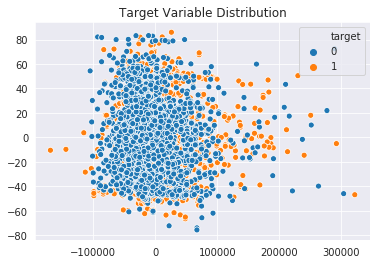

In [7]:
# reduce data to two dimensions
from sklearn.decomposition import PCA
Data_2D = PCA(n_components=2).fit_transform(Data)

sns.scatterplot(Data_2D[:,0], Data_2D[:,1], hue=target)
plt.title("Target Variable Distribution")
plt.show();

### Scale Data

In [8]:
Data_raw = Data.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Data = scaler.fit_transform(Data_raw.drop(['explicit'], axis=1))
Data = pd.DataFrame(Data, columns=Data_raw.drop(['explicit'], axis=1).columns)
Data['explicit'] = Data_raw['explicit']
Data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,popularity
count,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,...,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000
mean,0.403950,0.523949,0.641484,0.516285,0.616461,0.486800,0.653744,0.700464,0.732612,0.583066,0.642094,0.477662,0.481330,0.559737,0.594378,0.302262,0.515666,0.610713,0.550493,0.337882,0.354704,0.688081,0.583110,0.589831,0.554210,0.531986,0.399927,0.626288,0.373133,0.499824,0.515030,0.486869,0.717616,0.317844,0.648891,0.361682,0.422280,0.442318,0.542187,0.557467,...,0.471113,0.549917,0.509913,0.494273,0.368844,0.422776,0.435567,0.614508,0.625155,0.478093,0.437286,0.598908,0.491456,0.502746,0.623038,0.512164,0.485878,0.564822,0.694510,0.495068,0.451031,0.503798,0.485163,0.431004,0.437274,0.496491,0.469703,0.274668,0.575307,0.344138,0.626233,0.057411,0.482555,0.165017,0.782797,0.717590,0.073013,0.461035,0.739292,0.360708
std,0.246381,0.179432,0.185129,0.111516,0.194823,0.177495,0.118186,0.201315,0.143512,0.135338,0.117331,0.154544,0.154942,0.150198,0.227066,0.136933,0.111297,0.137693,0.179022,0.148474,0.160524,0.133292,0.151831,0.195653,0.147120,0.121433,0.127998,0.187624,0.138285,0.165909,0.158017,0.131959,0.160641,0.143373,0.163789,0.194457,0.136936,0.136769,0.213191,0.133633,...,0.171959,0.251315,0.133999,0.195567,0.180691,0.167422,0.239667,0.150718,0.155136,0.197196,0.185984,0.168689,0.235088,0.218372,0.130192,0.146682,0.172831,0.145259,0.152243,0.205015,0.137724,0.177212,0.184431,0.156203,0.158928,0.214922,0.259953,0.274153,0.132811,0.097215,0.196391,0.187375,0.325282,0.141803,0.105347,0.450236,0.119567,0.183881,0.064019,0.258783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.226066,0.440514,0.571171,0.450324,0.551106,0.389597,0.598143,0.620689,0.665653,0.506570,0.603672,0.380738,0.385674,0.471565,0.497748,0.221907,0.451614,0.526885,0.456213,0.243047,0.235185,0.644259,0.513290,0.522384,0.512006,0.460864,0.339857,0.572225,0.291335,0.414149,0.412409,0.429645,0.685633,0.249677,0.580496,0.230073,0.368888,0.366694,0.348330,0.470557,...,0.334982,0.346162,0.425260,0.336521,0.242935,0.293243,0.207426,0.556512,0.513344,0.331334,0.31307

### Modeling Embeddings

In [9]:
#from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1)
super_desc.append("embeddings")
print("Model: {}".format(super_desc[-1]))

new_score = supervised_clf(model=gbc,
                           data=df_emb.drop('id', axis=1),
                           target=target,
                           stratify=target)
super_score = super_score.append(new_score, ignore_index=True)

Model: embeddings

Training score: 1.0

Validation score: 0.9965753424657534

Cross validation: 88.1899 +/- 1.4482%


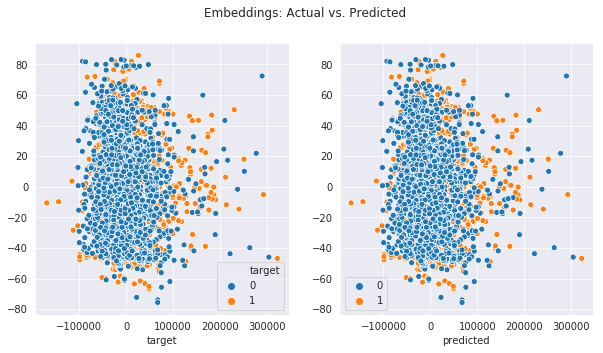

In [10]:
y_pred = gbc.predict(df_emb.drop('id', axis=1))
labels_list = [target, y_pred]
title_list=["target", "predicted", "Embeddings: Actual vs. Predicted"]
data=Data_2D
num_plots = range(0,2)
  
# plot target variable
fig, axes = plt.subplots(1, len(num_plots), figsize=(10,5))

for n in num_plots:
  sns.scatterplot(data[:,0], data[:,1],
                  hue=labels_list[n], ax=axes[n])
  axes[n].set_xlabel(title_list[n])

fig.suptitle(title_list[-1])
plt.show;

### Modeling Embeddings and Audio Features

In [11]:
#from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1)
super_desc.append("composite")
print("Model: {}".format(super_desc[-1]))

new_score = supervised_clf(model=gbc,
                           data=Data,
                           target=target,
                           stratify=target)
super_score = super_score.append(new_score, ignore_index=True)

Model: composite

Training score: 1.0

Validation score: 0.9954337899543378

Cross validation: 88.2757 +/- 1.4702%


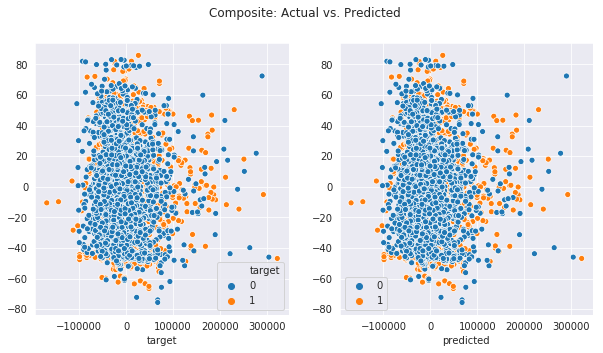

In [12]:
y_pred = gbc.predict(Data)
labels_list = [target, y_pred]
title_list=["target", "predicted", "Composite: Actual vs. Predicted"]
data=Data_2D
num_plots = range(0,2)
  
# plot target variable
fig, axes = plt.subplots(1, len(num_plots), figsize=(10,5))

for n in num_plots:
  sns.scatterplot(data[:,0], data[:,1],
                  hue=labels_list[n], ax=axes[n])
  axes[n].set_xlabel(title_list[n])

fig.suptitle(title_list[-1])
plt.show;

### Assessment

In [13]:
super_score[["cv_score", "variance"]].describe()

,cv_score,variance
count,2.00000,2.000000
mean,88.23280,1.459200
std,0.06067,0.015556
min,88.18990,1.448200
25%,88.21135,1.453700
50%,88.23280,1.459200
75%,88.25425,1.464700
max,88.27570,1.470200


In [15]:
super_score = pd.concat([pd.Series(super_desc, name="model"), super_score], axis=1)
super_score.sort_values(by=["cv_score"], ascending=False)

,model,train_score,test_score,cv_score,variance
1,composite,1.0,0.995434,88.2757,1.4702
0,embeddings,1.0,0.996575,88.1899,1.4482


## Conclusion